# Using Beautiful Soup

Beautiful Soup is a Python package used to analyze and manipulate HTML documents.  It is a part of the standard Anaconda distribution.  Since it is now on its fourth version we include it this way:

In [89]:
from bs4 import BeautifulSoup

In [90]:
simple_html = """\
<!DOCTYPE html>
<html>
<head>
<title>A simple html document</title>
</head>

<body>
<h1>This is a simple html document</h1>
<article>
<p>The web as of 1995 would have simple documents like this one.  Since then
additional technologies have been added.  <i>CSS</i> added suppport for styles,
downloadable fonts extend the typographical possibilities for designers, <i>SVG<i>
allows the browser to create any 2D image at any scale on-the-fly, sound and video
players are integrated into browsers of today, <i>Javascript</i> and its XMLHttpRequest object made modern ads possible. Most recently <i>WebASM</i> has enabled the
embedding of Python in a web page.
</article>
</body>
</html>
"""

We invoke BeautifulSoup and get back a tree representing the HTML.

In [91]:
soup = BeautifulSoup(simple_html, features="html.parser")

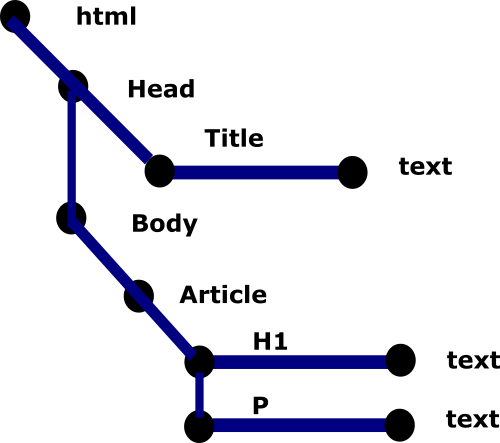

We can now ask for just the text elements for all the elements in the tree.  

This is not that useful.

In [92]:
soup.text

'\n\n\nA simple html document\n\n\nThis is a simple html document\n\nThe web as of 1995 would have simple documents like this one.  Since then\nadditional technologies have been added.  CSS added suppport for styles,\ndownloadable fonts extend the typographical possibilities for designers, SVG\nallows the browser to create any 2D image at any scale on-the-fly, sound and video\nplayers are integrated into browsers of today, Javascript and its XMLHttpRequest object made modern ads possible. Most recently WebASM has enabled the\nembedding of Python in a web page.\n\n\n\n'

-----
We could also ask for a list of elements inside the <article> tag and then print the text from each.  We do this with the _find_all()_ API

In [93]:
article = soup.find(['article'])
type(article)

bs4.element.Tag

In [94]:
article

<article>
<p>The web as of 1995 would have simple documents like this one.  Since then
additional technologies have been added.  <i>CSS</i> added suppport for styles,
downloadable fonts extend the typographical possibilities for designers, <i>SVG<i>
allows the browser to create any 2D image at any scale on-the-fly, sound and video
players are integrated into browsers of today, <i>Javascript</i> and its XMLHttpRequest object made modern ads possible. Most recently <i>WebASM</i> has enabled the
embedding of Python in a web page.
</i></i></p></article>

In [95]:
for tag in article.children:
    print(tag.text)



The web as of 1995 would have simple documents like this one.  Since then
additional technologies have been added.  CSS added suppport for styles,
downloadable fonts extend the typographical possibilities for designers, SVG
allows the browser to create any 2D image at any scale on-the-fly, sound and video
players are integrated into browsers of today, Javascript and its XMLHttpRequest object made modern ads possible. Most recently WebASM has enabled the
embedding of Python in a web page.



Getting closer!

Now let's bring in some another Python package _textwrap_ that will give us nice readable lines.

In [96]:
import textwrap

In [97]:
for tag in article.children:
    print('\n'.join(textwrap.wrap(tag.text)))


The web as of 1995 would have simple documents like this one.  Since
then additional technologies have been added.  CSS added suppport for
styles, downloadable fonts extend the typographical possibilities for
designers, SVG allows the browser to create any 2D image at any scale
on-the-fly, sound and video players are integrated into browsers of
today, Javascript and its XMLHttpRequest object made modern ads
possible. Most recently WebASM has enabled the embedding of Python in
a web page.


But all is not so easy.  In particular list tags give problems.

So we make an HTML list in our document and then see what happens. 

In [98]:
simple_html_with_list = """\
<!DOCTYPE html>
<html>
<head>
<title>A simple html document</title>
</head>

<body>
<h1>This is a simple html document</h1>
<article>
<p>The web as of 1995 would have simple documents like this one.  Since then
additional technologies have been added.</p>
<ul>
<li><i>CSS</i> added suppport for styles,
downloadable fonts extend the typographical possibilities for designers,</li>
<li><i>SVG<i>
allows the browser to create any 2D image at any scale on-the-fly,</li>
<li>sound and video
players are integrated into browsers of today,</li> <li><i>Javascript</i> and its XMLHttpRequest object made modern ads possible. Most recently <i>WebASM</i> has enabled the
embedding of Python in a web page.</li>
</ul>
</article>
</body>
</html>
"""

In [99]:
soup2 = BeautifulSoup(simple_html_with_list, features="html.parser")
article2 = soup2.find(['article'])
for tag in article2.children:
    print('\n'.join(textwrap.wrap(tag.text)))


The web as of 1995 would have simple documents like this one.  Since
then additional technologies have been added.

 CSS added suppport for styles, downloadable fonts extend the
typographical possibilities for designers, SVG allows the browser to
create any 2D image at any scale on-the-fly, sound and video players
are integrated into browsers of today, Javascript and its
XMLHttpRequest object made modern ads possible. Most recently WebASM
has enabled the embedding of Python in a web page.



The problem is that the list comes back as the child of the \<p\> tag.
All the text elements in the list are retrieved from the tree and wrapped together, losing the fact this is a list.
    
We need to pull the article out as a distinct tree and then find the particular tags we want to print the text from.

In [100]:
soup2 = BeautifulSoup(simple_html_with_list, features="html.parser")
article3 = soup2.find(['article']).extract()
for tag in article3.find_all(['p','li']):
    print('\n'.join(textwrap.wrap(tag.text))+'\n')

The web as of 1995 would have simple documents like this one.  Since
then additional technologies have been added.

CSS added suppport for styles, downloadable fonts extend the
typographical possibilities for designers,

SVG allows the browser to create any 2D image at any scale on-the-fly,

sound and video players are integrated into browsers of today,

Javascript and its XMLHttpRequest object made modern ads possible.
Most recently WebASM has enabled the embedding of Python in a web
page.



We are getting close to something readable.  Let's emphasize the list by putting an "o" in front.  For this we need to look at what type of tag this is and process the \<li\> tags differently.

In [101]:
for tag in article3.find_all(['p','li']):
    if tag.name == 'li':
        print("o ", end='')
    print('\n'.join(textwrap.wrap(tag.text))+'\n')

The web as of 1995 would have simple documents like this one.  Since
then additional technologies have been added.

o CSS added suppport for styles, downloadable fonts extend the
typographical possibilities for designers,

o SVG allows the browser to create any 2D image at any scale on-the-fly,

o sound and video players are integrated into browsers of today,

o Javascript and its XMLHttpRequest object made modern ads possible.
Most recently WebASM has enabled the embedding of Python in a web
page.

